In [1]:
import numpy as np 
import pandas as pd 
import math 
import missingno as msno 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/telecom_users.csv")
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


<AxesSubplot:>

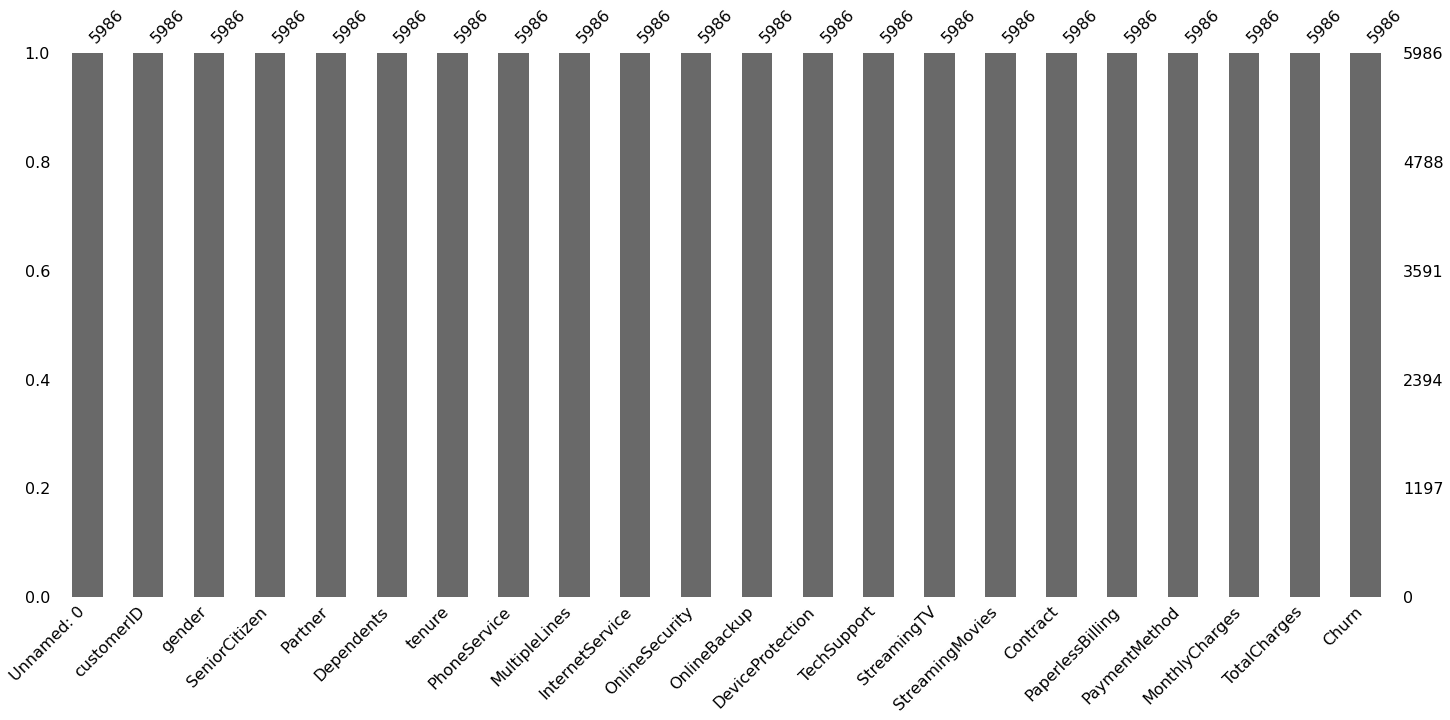

In [3]:
msno.bar(data)

In [4]:
data.nunique()

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

In [5]:
data.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [7]:
data.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,0895-DQHEW,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


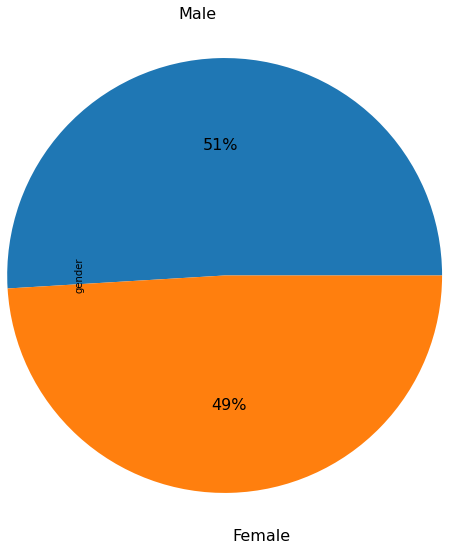

In [8]:
gender = data['gender'].value_counts()

plt.figure(figsize=(7, 5))

plot = gender.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)
plt.show()

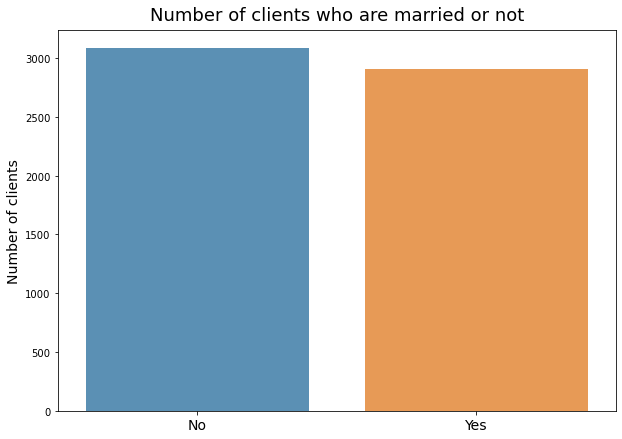

In [9]:
ismaried = data['Partner'].value_counts()

plt.figure(figsize=(10, 7))

sns.barplot(x=ismaried.index, y=ismaried.values, alpha=0.8)
plt.title('Number of clients who are married or not', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

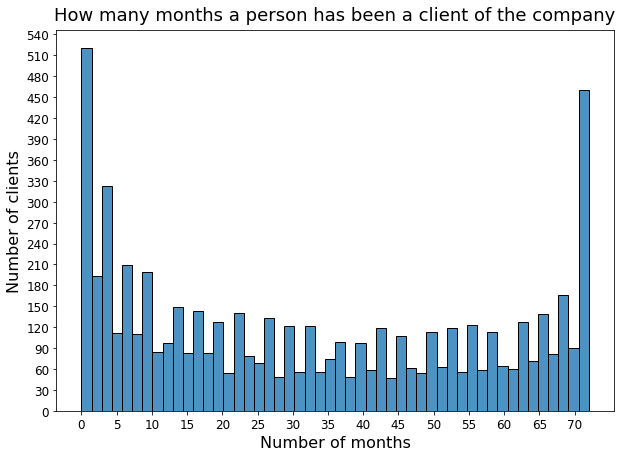

In [10]:
tenure = data['tenure']

plt.figure(figsize=(10, 7))
sns.histplot(tenure, bins=50, alpha=0.8)

plt.title('How many months a person has been a client of the company', fontsize=18, pad=10)
plt.xticks(list(range(0, tenure.max(), 5)), fontsize=12)
plt.yticks(list(range(0, 550, 30)), fontsize=12)
plt.xlabel('Number of months', fontsize=16)
plt.ylabel('Number of clients', fontsize=16)
plt.show()

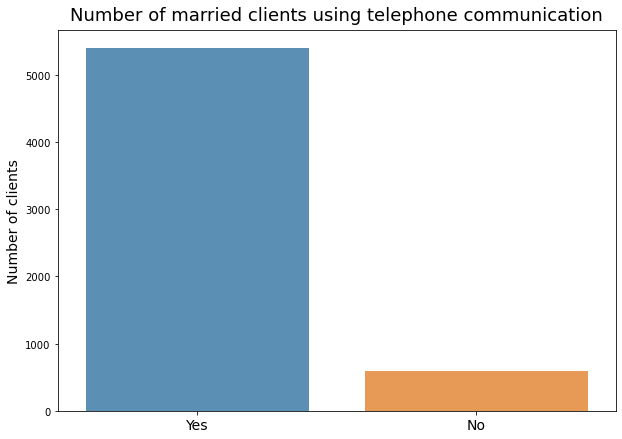

In [11]:
phone_servise = data['PhoneService'].value_counts()

plt.figure(figsize=(10, 7))

sns.barplot(x=phone_servise.index, y=phone_servise.values, alpha=0.8)
plt.title('Number of married clients using telephone communication', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

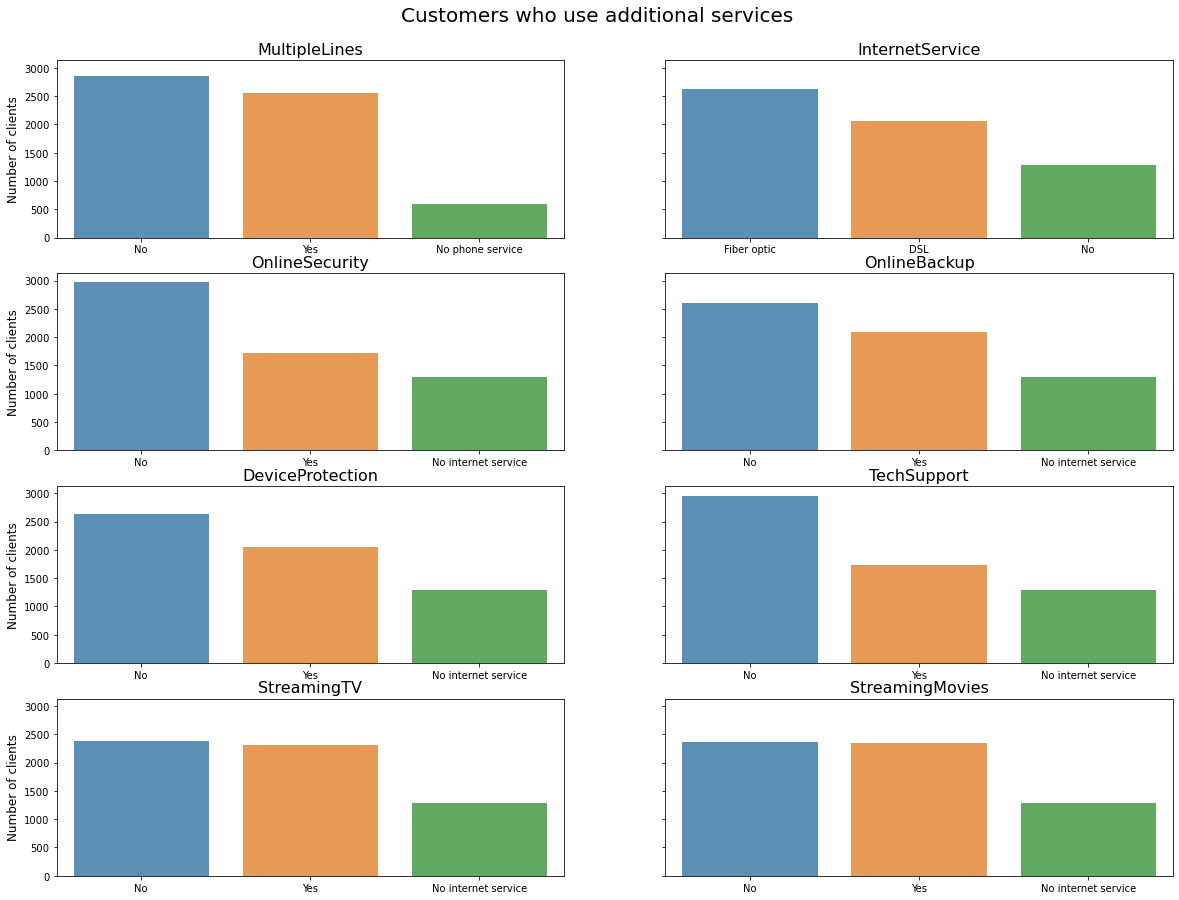

In [12]:
other_servises = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies']

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15), sharey=True)
t = 0


for i in range(4):
    for j in range(2):
        data_prep = [data[obj].value_counts()  for obj in other_servises]
        axes = ax[i][j]

        sns.barplot(x=data_prep[t].index, y=data_prep[t].values, ax=axes, alpha=0.8)
        axes.set_title(other_servises[t], fontsize=16)
        axes.set_yticks(list(range(0, 3001, 500)))
        if j == 0:
            axes.set_ylabel('Number of clients', fontsize=12)
        t += 1

fig.suptitle('Customers who use additional services', y=0.93, fontsize=20)
plt.show()

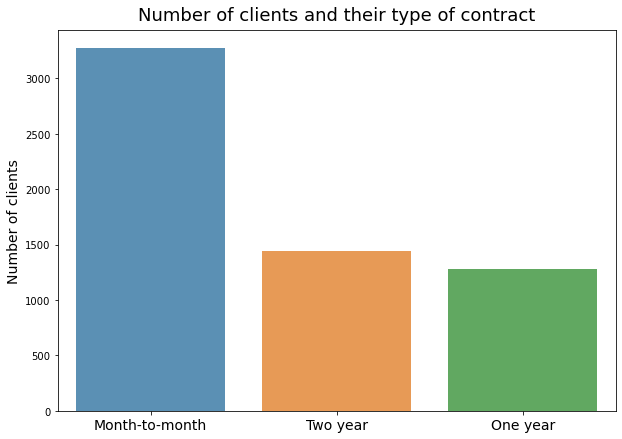

In [13]:
contract = data['Contract'].value_counts()

plt.figure(figsize=(10, 7))

sns.barplot(x=contract.index, y=contract.values, alpha=0.8)
plt.title('Number of clients and their type of contract', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


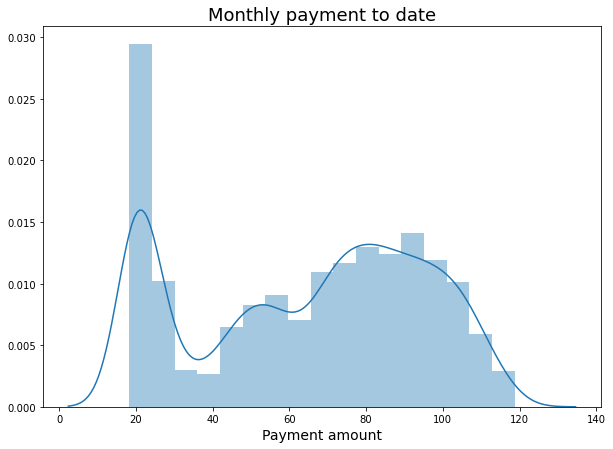

In [14]:
montly_charges = data['MonthlyCharges']

plt.figure(figsize=(10, 7))

sns.distplot(montly_charges).set(ylabel=None, xlabel=None)
plt.title('Monthly payment to date', fontsize=18)
plt.xlabel('Payment amount', fontsize=14)
plt.show()

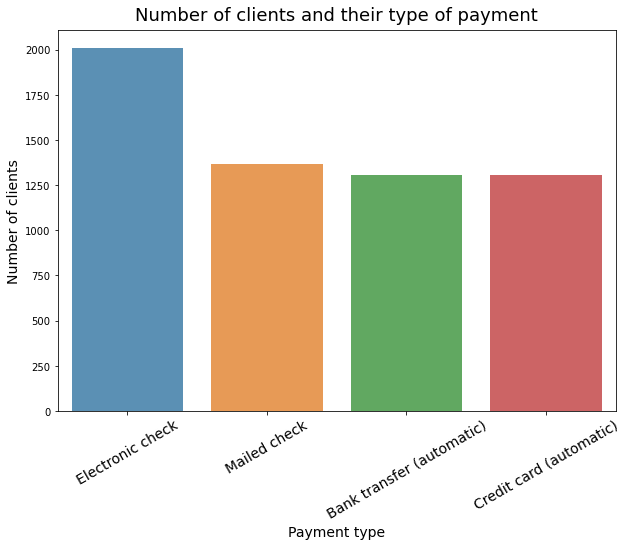

In [15]:
PaymentMethod = data['PaymentMethod'].value_counts()

plt.figure(figsize=(10, 7))

sns.barplot(x=PaymentMethod.index, y=PaymentMethod.values, alpha=0.8)
plt.title('Number of clients and their type of payment', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xlabel('Payment type', fontsize=14)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=10)
plt.show()

In [16]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [17]:
object_cols = list(data.dtypes[data.dtypes == object].index)

for i in object_cols:
    data[i] = data[i].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,4252,1,0,1,1,72,1,2,2,...,1,1,1,1,2,0,1,24.10,1066,0
1,4528,5806,0,0,0,0,44,1,0,1,...,2,0,2,0,0,1,1,88.15,2901,0
2,6344,5577,0,1,1,0,38,1,2,1,...,0,0,0,0,0,1,0,74.95,2126,1
3,6739,4243,1,0,0,0,4,1,0,0,...,0,0,0,2,0,1,2,55.90,1733,0
4,432,1270,1,0,0,0,2,1,0,0,...,2,0,0,0,0,0,2,53.45,308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,402,1,0,1,0,1,1,0,1,...,0,0,2,2,0,1,2,95.00,5540,1
5982,5191,3616,0,0,1,1,23,1,2,0,...,2,2,2,2,2,1,1,91.10,1561,0
5983,5226,4858,1,0,1,1,12,1,0,2,...,1,1,1,1,0,1,2,21.15,2290,0
5984,5390,4499,1,1,0,0,12,1,2,1,...,2,0,2,2,0,1,2,99.45,322,1


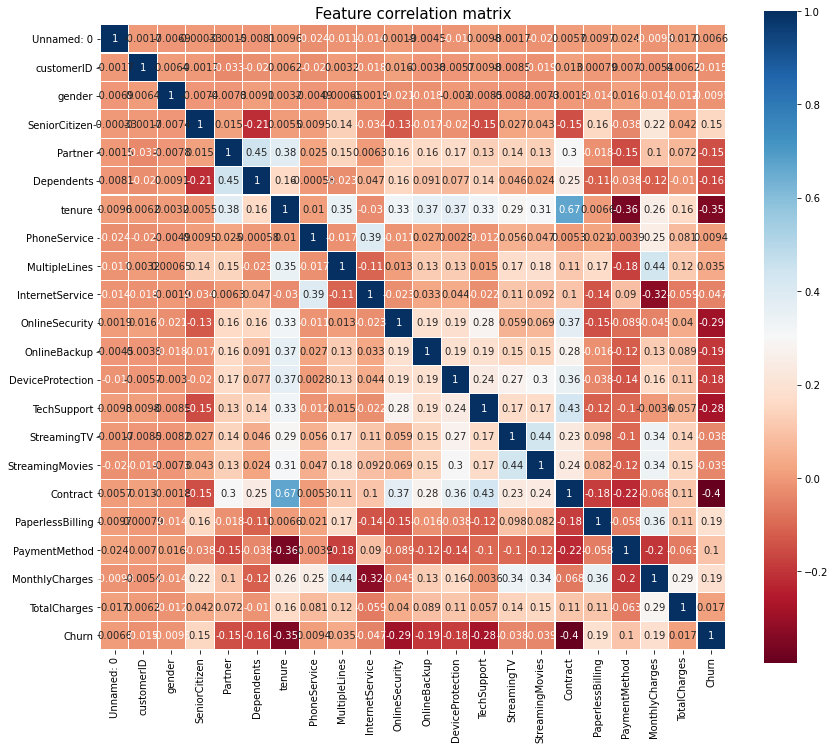

In [18]:
# Define train and test datasets for training
drop_elements = ['Unnamed: 0', 'customerID', 'Churn']
train = data.drop(drop_elements, axis=1)
test = data['Churn']
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Feature correlation matrix', y=1, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [19]:
corr_train = data.corr()
Churn = pd.DataFrame(corr_train['Churn'].sort_values(ascending=False))
Churn

,Churn
Churn,1.000000
PaperlessBilling,0.188996
MonthlyCharges,0.186753
SeniorCitizen,0.150097
PaymentMethod,0.103927
MultipleLines,0.034943
TotalCharges,0.016573
PhoneService,0.009421
Unnamed: 0,0.006630
gender,-0.009548


In [20]:
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                     cross_val_predict)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
skf = StratifiedKFold(n_splits=5)


gbc = GradientBoostingClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
ada = AdaBoostClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=17) 

In [21]:
xgb_model = XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
xgb_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1.7817, missing=nan, monotone_constraints='()',
              n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
              random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
              scale_pos_weight=1, subsample=0.5213, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [22]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[790,  93],
       [154, 161]])

In [23]:
accuracy_score(y_test, y_pred)

0.7938230383973289

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       883
           1       0.63      0.51      0.57       315

    accuracy                           0.79      1198
   macro avg       0.74      0.70      0.72      1198
weighted avg       0.78      0.79      0.79      1198



In [25]:
rfc_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [26]:
rfc_best_params = {'criterion': 'gini',
    'max_depth': 7,
    'max_features': 'auto',
    'n_estimators': 500}
gbc_params = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth': [3,5,8],
    'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    }
# CV_gbc = GridSearchCV(gbc, gbc_params, scoring='roc_auc', cv=skf)
# CV_gbc.fit(X_train, y_train)
# gbc_best_params = CV_gbc.best_params_
gbc_best_params = {'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.618}
svc_params = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
# CV_svc = GridSearchCV(svc, svc_params, scoring='roc_auc', cv=skf)
# CV_svc.fit(X_train, y_train)
# svc_best_params = CV_svc.best_params_
svc_best_params = {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
ada_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]
}
# CV_ada = GridSearchCV(ada, ada_params, scoring='roc_auc', cv=skf)
# CV_ada.fit(X_train, y_train)
# ada_best_params = CV_ada.best_params_
ada_best_params = {'learning_rate': 0.1, 'n_estimators': 200}
gbc_model = GradientBoostingClassifier(**gbc_best_params, random_state=42)
rfc_model = RandomForestClassifier(**rfc_best_params, random_state=42)
svc_model = SVC(**svc_best_params, random_state=42)
ada_model = AdaBoostClassifier(**ada_best_params, random_state=42)
meta = XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =42, nthread = -1)
models = [('gbc', gbc_model), ('rf', rfc_model), ('svc', svc_model), ('ada', ada_model)]
stacking_clf = StackingClassifier(models, meta, cv=skf)
stacking_clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x7FDF0765A9E0, shuffle=False),
                   estimators=[('gbc',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           random_state=42,
                                                           subsample=0.618)),
                               ('rf',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('svc',
                                SVC(C=100, gamma=0.0001, random_state=42)),
                               ('ada',
                                AdaBoo...
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
    

In [27]:
y_pred2 = stacking_clf.predict(X_test)
stacking_clf.score(X_test, y_test)

0.7796327212020033

In [28]:
confusion_matrix(y_test, y_pred2)

array([[780, 103],
       [161, 154]])

In [29]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       883
           1       0.60      0.49      0.54       315

    accuracy                           0.78      1198
   macro avg       0.71      0.69      0.70      1198
weighted avg       0.77      0.78      0.77      1198

